# TP1 EXPLORACION DE DATOS JAMPP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import calendar
import pickle
%matplotlib inline


In [2]:
data_clicks = pd.read_csv('clicks.csv')
data_clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [3]:
data_clicks.tail()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
26346,0,NaN,0,2019-03-11T01:21:45.937Z,6333597102633388268,1.218924,1.071209,False,6.0,_qwk0t_ZPQzqTZBWh7Nfiu0bFQYj-kM,3.378640e+18,NaN,4.566454e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,7232175289175921981
26347,0,NaN,0,2019-03-11T18:54:09.609Z,6333597102633388268,1.205689,1.070234,False,6.0,UAlQUQ79dtQFYK4NeAci37VRWLMSHgA,6.391567e+18,NaN,7.452406e+18,392184377613098015,2.0,NaN,0.010,0.973,1891515180541284343,8569678576097759996
26348,0,NaN,0,2019-03-11T22:37:45.177Z,6333597102633388268,1.208059,1.069624,False,6.0,ndzyfLZHfr86-c-05lmc1oHAg7yqr0c,6.391567e+18,NaN,7.452406e+18,392184377613098015,1.0,NaN,0.119,0.668,1891515180541284343,3490036337080546429
26349,0,NaN,0,2019-03-11T23:57:18.971Z,6333597102633388268,1.205689,1.070234,False,6.0,bPyYbAHs3WK3j-0YEb5_6bFfYic8u5U,5.975656e+18,NaN,3.072849e+18,392184377613098015,2.0,NaN,NaN,NaN,1891515180541284343,2939898024008631508
26350,2,NaN,10,2019-03-08T04:26:45.168Z,6333597102633388268,1.205689,1.070234,False,1.0,vbmNE2dColwh99QqQ5GLnxYdlSSoqGI,3.875707e+18,NaN,5.745805e+18,2733035977666442898,NaN,4.325,0.194,0.517,1891515180541284343,8168254012071416296


In [4]:
data_installs = pd.read_csv('installs.csv')
data_installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [5]:
data_clicks.isnull().any()

advertiser_id      False
action_id           True
source_id          False
created            False
country_code       False
latitude           False
longitude          False
wifi_connection    False
carrier_id          True
trans_id           False
os_minor            True
agent_device        True
os_major            True
specs_brand        False
brand               True
timeToClick         True
touchX              True
touchY              True
ref_type           False
ref_hash           False
dtype: bool

In [6]:
data_clicks.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [7]:
data_clicks.dropna(subset = ['timeToClick'],inplace=True)

In [8]:
data_clicks.isnull().sum()

advertiser_id          0
action_id          22977
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id             0
trans_id               0
os_minor               1
agent_device       20369
os_major               1
specs_brand            0
brand              17593
timeToClick            0
touchX                16
touchY                16
ref_type               0
ref_hash               0
dtype: int64

In [9]:
data_clicks.describe()

,advertiser_id,action_id,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,22977.000000,0.0,22977.000000,2.297700e+04,22977.000000,22977.000000,22977.000000,2.297600e+04,2.608000e+03,2.297600e+04,2.297700e+04,5384.000000,22977.000000,22961.000000,22961.000000,2.297700e+04,2.297700e+04
mean,2.999434,NaN,1.223267,6.333597e+18,1.206903,1.070236,7.671976,4.641440e+18,4.276845e+18,3.798461e+18,1.246197e+18,1.464896,230.403309,0.639075,1.481326,1.891763e+18,4.604827e+18
std,0.051523,NaN,2.186474,1.024022e+03,0.004466,0.001908,6.808828,1.643993e+18,2.559120e+18,1.824554e+18,1.127395e+18,1.564714,976.849149,0.301806,2.624922,1.619161e+17,2.672246e+18
min,0.000000,NaN,0.000000,6.333597e+18,1.205058,1.058204,0.000000,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,3.000000,3.378640e+18,1.754528e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.427000,0.185000,1.891515e+18,2.274755e+18
50%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,6.000000,3.511538e+18,3.729278e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726000,0.646000,1.891515e+18,4.613545e+18
75%,3.000000,NaN,1.000000,6.333597e+18,1.205689,1.070234,12.000000,6.391567e+18,6.852389e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.901000,0.991000,1.891515e+18,6.906644e+18
max,8.000000,NaN,10.000000,6.333597e+18,1.237861,1.085358,116.000000,9.081082e+18,9.221733e+18,7.499732e+18,5.675296e+18,13.000000,17616.188000,1.000000,16.600000,6.323872e+18,9.221118e+18


Aquí vamos ver cuántos segundos trascurren hasta clickear.

Text(0,0.5,'Frecuencia')

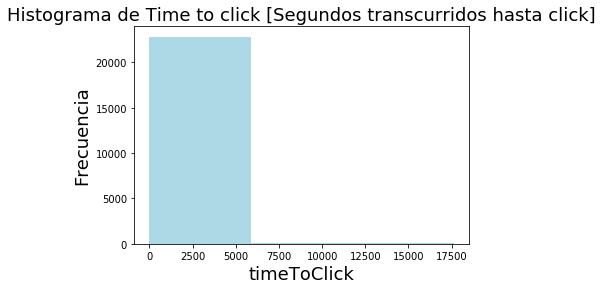

In [10]:
g = data_clicks["timeToClick"].plot.hist(bins=3, color='lightblue')
g.set_title("Histograma de Time to click [Segundos transcurridos hasta click]", fontsize=18)
g.set_xlabel("timeToClick",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [11]:
data_clicks["timeToClick_log"] = np.log(data_clicks["timeToClick"]+1)

Text(0,0.5,'Frecuencia')

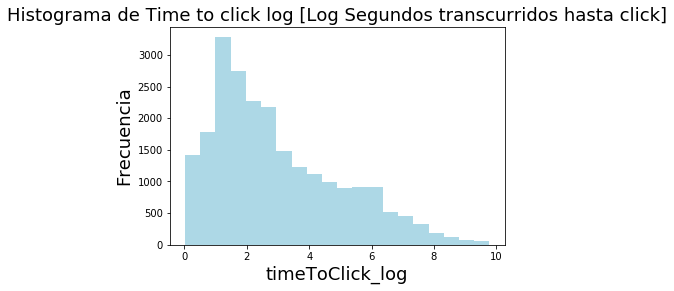

In [12]:
g = data_clicks["timeToClick_log"].plot.hist(bins=20, color='lightblue')
g.set_title("Histograma de Time to click log [Log Segundos transcurridos hasta click]", fontsize=18)
g.set_xlabel("timeToClick_log",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Un poco de exploracion de relación entre variables

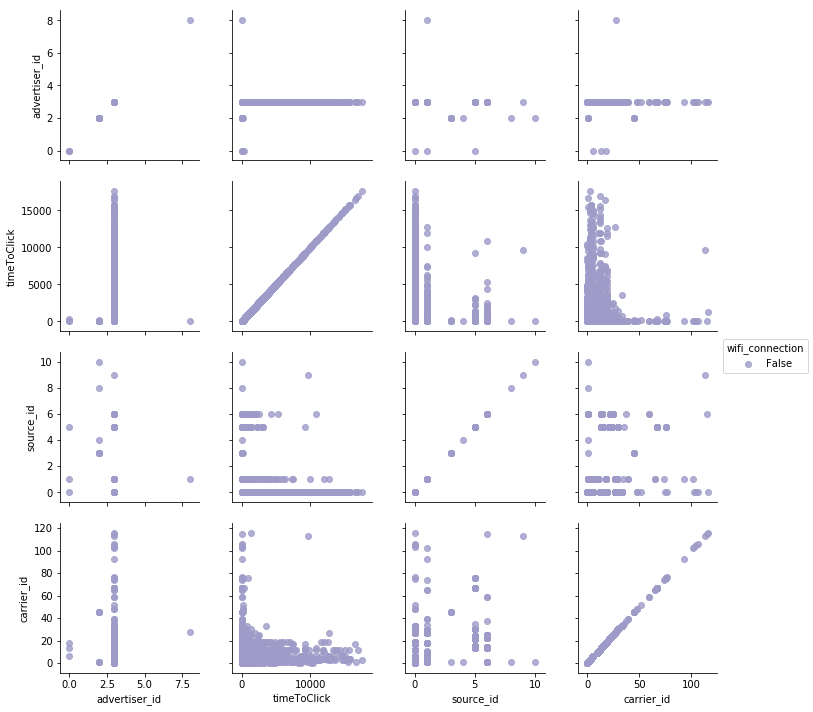

In [40]:
g = sns.PairGrid(data_clicks, vars=['advertiser_id', 'timeToClick', 'source_id','carrier_id'],
                 hue='wifi_connection', palette='Purples_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [16]:
data_clicks.dtypes

advertiser_id        int64
action_id          float64
source_id            int64
created             object
country_code         int64
latitude           float64
longitude          float64
wifi_connection       bool
carrier_id         float64
trans_id            object
os_minor           float64
agent_device       float64
os_major           float64
specs_brand          int64
brand              float64
timeToClick        float64
touchX             float64
touchY             float64
ref_type             int64
ref_hash             int64
timeToClick_log    float64
dtype: object

In [17]:
# Convertimos el formato a fecha y lo abrimos 
data_clicks['created'] = pd.to_datetime(data_clicks['created'])
data_clicks['Year'] = data_clicks['created'].map(lambda x:x.year)
data_clicks['Día'] = pd.to_datetime(data_clicks['created'],format='%H:%M',errors='coerce').dt.day 
data_clicks['Hour'] = pd.to_datetime(data_clicks['created'], format='%H:%M',errors='coerce').dt.hour

In [18]:
data_clicks.dtypes

advertiser_id               int64
action_id                 float64
source_id                   int64
created            datetime64[ns]
country_code                int64
latitude                  float64
longitude                 float64
wifi_connection              bool
carrier_id                float64
trans_id                   object
os_minor                  float64
agent_device              float64
os_major                  float64
specs_brand                 int64
brand                     float64
timeToClick               float64
touchX                    float64
touchY                    float64
ref_type                    int64
ref_hash                    int64
timeToClick_log           float64
Year                        int64
Día                         int64
Hour                        int64
dtype: object

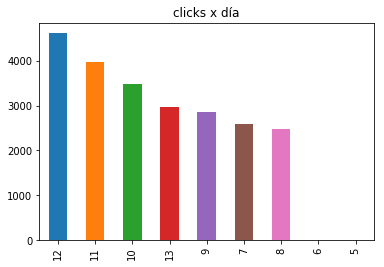

In [19]:
plot = data_clicks['Día'].value_counts().plot(kind='bar',
                                            title='clicks x día')

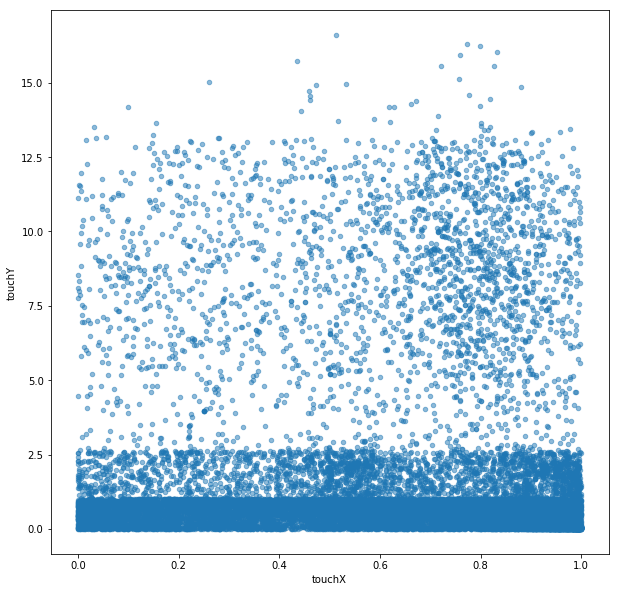

In [20]:
data_clicks.plot.scatter('touchX','touchY',alpha=0.5,figsize=(10,10));

Text(0,0.5,'Frecuencia')

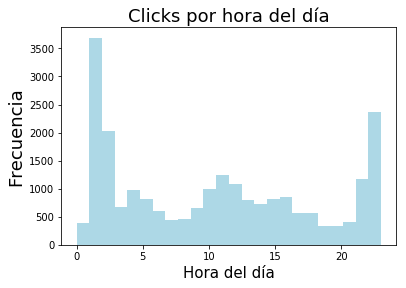

In [23]:
g = data_clicks["Hour"].plot.hist(bins=24, color='lightblue')

g.set_title("Clicks por hora del día", fontsize=18)
g.set_xlabel("Hora del día",fontsize=15)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0,0.5,'Frecuencia')

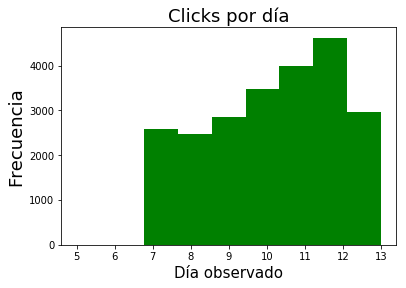

In [24]:
g = data_clicks['Día'].plot.hist(bins=9, color='green')

g.set_title("Clicks por día", fontsize=18)
g.set_xlabel("Día observado",fontsize=15)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0,0.5,'Cantidad de clicks')

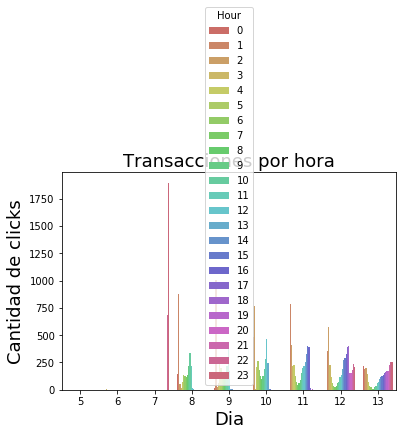

In [25]:
figsize=(100,10)
g = sns.countplot(x="Día", hue='Hour', data=data_clicks, palette="hls")
g.set_title("Transacciones por hora", fontsize=18)
g.set_xlabel("Dia", fontsize=18)
g.set_ylabel("Cantidad de clicks", fontsize=18)

# Installs


In [26]:
data_installs = pd.read_csv('installs.csv')
data_installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [32]:
data_installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 21 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
Year                  3412 non-null int64
Día                   3412 non-null int64
Hour                  3412 non-null int6

In [41]:
data_installs['attributed'].value_counts()


False    3412
Name: attributed, dtype: int64

In [42]:
data_installs['implicit'].value_counts()

False    2547
True      865
Name: implicit, dtype: int64

In [43]:
#Transformamos la fecha de 'create' en campos fechas separados en año,día y hora
data_installs['created'] = pd.to_datetime(data_installs['created'])
data_installs['Year'] = data_installs['created'].map(lambda x:x.year)
data_installs['Día'] =pd.to_datetime(data_installs['created'],format='%H:%M',errors='coerce').dt.day 
data_installs['Hour'] = pd.to_datetime(data_installs['created'], format='%H:%M',errors='coerce').dt.hour

In [44]:
data_installs.tail()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,...,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,Year,Día,Hour
3407,2019-03-06 17:49:41.192,34,1891515180541284343,1143264973891382982,NaN,False,False,2970470518450881158,NaN,7.116343e+18,...,NaN,NaN,NaN,NaN,NaN,8722591301157431935,4.077062e+17,2019,6,17
3408,2019-03-06 11:18:22.500,34,1891515180541284343,8229515080680415343,NaN,False,False,2970470518450881158,NaN,7.660126e+18,...,NaN,NaN,NaN,NaN,NaN,292836002535897700,4.077062e+17,2019,6,11
3409,2019-03-05 11:03:58.537,19,1494519392962156891,8280469812012804019,NaN,False,False,6333597102633388268,5.951325e+18,4.349816e+18,...,NaN,NaN,NaN,NaN,89bda305-bff1-4c22-ae23-1a237eac0002,543629953276043235,4.621024e+18,2019,5,11
3410,2019-03-07 13:42:47.814,19,1494519392962156891,1530864130516519187,NaN,False,False,6333597102633388268,5.951325e+18,1.764701e+18,...,NaN,NaN,NaN,NaN,22380348598,5929364725345188154,1.526421e+18,2019,7,13
3411,2019-03-07 11:53:56.571,13,1494519392962156891,8640089135129800275,NaN,False,False,2970470518450881158,NaN,3.411306e+18,...,NaN,NaN,NaN,NaN,NaN,259593822520479626,3.301378e+18,2019,7,11


Text(0,0.5,'Frecuencia')

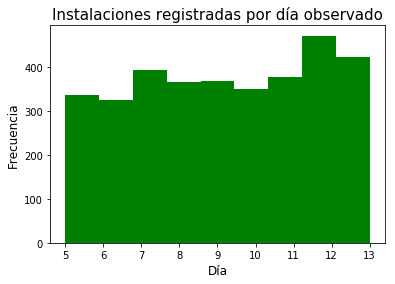

In [45]:
#Instalaciones x día
g = data_installs["Día"].plot.hist(bins=9, color='green')

g.set_title("Instalaciones registradas por día observado", fontsize=15)
g.set_xlabel("Día",fontsize=12)
g.set_ylabel("Frecuencia", fontsize=12)

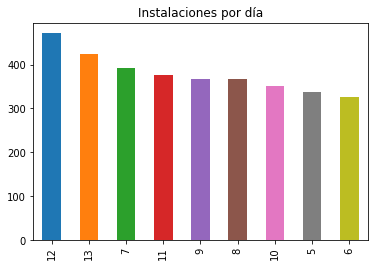

In [46]:
plot = data_installs['Día'].value_counts().plot(kind='bar',
                                            title='Instalaciones por día')

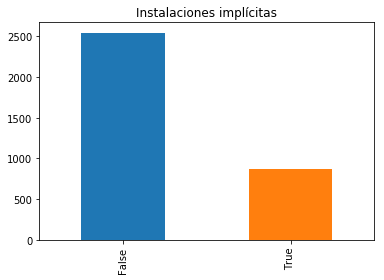

In [37]:
plot = data_installs['implicit'].value_counts().plot(kind='bar',
                                            title='Instalaciones implícitas')

In [38]:
data_installs ['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

Text(0,0.5,'Frecuencia')

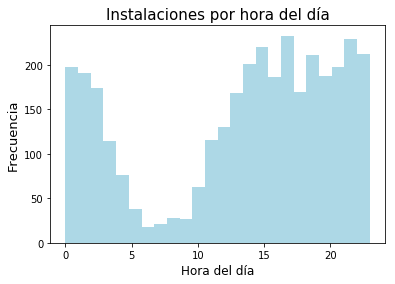

In [39]:
g = data_installs["Hour"].plot.hist(bins=24, color='lightblue')

g.set_title("Instalaciones por hora del día", fontsize=15)
g.set_xlabel("Hora del día",fontsize=12)
g.set_ylabel("Frecuencia", fontsize=13)

In [1]:
auctions = pickle.load(open('auctions.pickle', 'rb'))

SyntaxError: invalid syntax (<ipython-input-1-21b7e2919ff9>, line 1)

In [ ]:
def cantidad_de_subastas_por_device_id_ordenado():
    fig, ax = plt.subplots(1, 1)
    counts = pd.value_counts(auctions.device_id)
    np.log10(counts.reset_index().device_id).plot.line(ax=ax, marker='o', ms=1)
    ax.set_title('Cantidad de subastas por device_id (ordenado)')
    ax.set_xlabel('device_id (ordenado)')
    ax.set_ylabel('Nº de subastas ($log_{10}$)')
    # plt.show()


In [ ]:
def ocurrencias_por_dia_top_5():
    n = 5
    counts = pd.value_counts(auctions.device_id)
    top_n = list(counts[:n].keys())
    filt = [auctions.device_id == i for i in top_n]
    for i in range(len(filt) - 1):
        filt[0] ^= filt[i + 1]
    days = auctions.date.apply(lambda x: x.day)
    auctions['days'] = days
    auctions_filt = auctions[filt[0]]

    df = auctions_filt.pivot_table(
        index=['days'],
        aggfunc={'device_id': np.count_nonzero},
        columns="device_id")

    fig, ax = plt.subplots(1, 1)
    df.plot.bar(ax=ax)
    ax.set_title('Ocurrencias por dia (top 5)')
    ax.set_xlabel('Dia')
    ax.set_ylabel('Ocurrencias')
    # plt.show()

In [ ]:
def subastas_promedio_por_hora_del_dia_top_5():
    n = 5
    counts = pd.value_counts(auctions.device_id)
    top_n = list(counts[:n].keys())
    filt = [auctions.device_id == i for i in top_n]
    for i in range(len(filt) - 1):
        filt[0] ^= filt[i + 1]
    hours = auctions.date.apply(lambda x: x.hour)
    days = auctions.date.apply(lambda x: x.day)
    auctions['hour_series'] = hours
    auctions['days'] = days
    auctions_filt = auctions[filt[0]]

    df = auctions_filt.pivot_table(
        index=["hour_series", 'days'],
        aggfunc={'date': np.count_nonzero},
        columns="device_id").unstack('hour_series').mean().unstack('device_id')
    df = df.reset_index()
    del df['level_0']

    fig, ax = plt.subplots(1, 1)
    plt.plot(df.values[:, 0], df.values[:, 1:])
    # auctions_filt.pivot_table(index=["hour_series"], aggfunc=np.count_nonzero, columns="device_id", values="date").plot.bar(ax=ax)
    ax.set_title('Subastas por hora del día')
    ax.set_xlabel('Horas')
    ax.set_ylabel('Ocurrencias')
    # plt.show()

In [ ]:
def cantidad_de_subastas_por_hora_del_dia_todos():

    daymap = {1: "Lunes", 2: "Martes", 3: "Miercoles", 4: "Jueves",
        5: "Viernes", 6: "Sábado", 7: "Domingo"}

    auctions['hour_series'] = auctions.date.apply(lambda x: x.hour)
    auctions['day_of_week'] = auctions.date.apply(lambda x: (x.day, x.isoweekday()))

    df2 = auctions.pivot_table(index=['hour_series', 'day_of_week'], aggfunc={'device_id': np.count_nonzero}).unstack()
    df4 = df2.reset_index().device_id
    new_names = { i:daymap[i[1]]+" "+str(i[0]) for i in df4.columns }
    named_df = df4.rename(columns=new_names)

    fig, ax = plt.subplots(1,1); named_df.plot.line(ax=ax)
    ax.set_xlabel('Horas'); ax.set_ylabel('Ocurrencias'); ax.set_title('Cantidad de subastas por hora de cada dia');
    plt.legend(fontsize='small')
    fig.tight_layout()
    #plt.show()